In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
df=pd.read_csv("Datathon.csv", sep=",")
df.columns=["Transaccion","Comercio","Tipo Comercio","Especifico","Fecha","Pais","Forma Pago","Sexo","Estado","Edad","Monto","ID"]

# Separar la columna de fecha y hora

In [3]:


lista = df['Fecha'].str.split(" ")
fecha=[]
hora=[]
for i in range (len(lista)):
    fecha.append(lista[i][0])
    hora.append(lista[i][1])
Fecha=[]
for i in range(len(fecha)):
    Fecha.append(fecha[i].split("-"))
Hora = []
for i in range(len(hora)):
    Hora.append(hora[i].split(":"))


In [4]:
Fecha = pd.DataFrame(Fecha,columns=["Año","Mes","Dia"])
Hora = pd.DataFrame(Hora,columns=["Hora","Minuto","Segundo"])
Hora = pd.DataFrame(Hora,columns=["Hora","Minuto"])
Tiempo = np.concatenate((Fecha,Hora),axis=1)
Tiempo = pd.DataFrame(Tiempo,columns=["Año","Mes","Dia","Hora","Minuto" ]).astype(int)
Tiempo["Hora"].min()


0

# Crear una columna con el tiempo de forma ordinal


In [5]:
from datetime import date
from datetime import datetime
fechita = date(Tiempo['Año'][0],Tiempo['Mes'][0],Tiempo['Dia'][0])
fechita=[]
for i in range(len(Tiempo)):
    fechita.append(date(Tiempo['Año'][i],Tiempo['Mes'][i],Tiempo['Dia'][i]).toordinal())
    i+=1
id = df["ID"]
id = pd.DataFrame(id)
fechita= pd.DataFrame(fechita)
monto = pd.DataFrame(df["Monto"])


In [6]:
FechaCompra = np.concatenate((fechita,Hora,monto,id),axis=1)
FechaCompra=pd.DataFrame(FechaCompra,columns=['Fecha','Hora','Minuto','Monto',"ID"])
FechaCompra["Fecha"] -= 738467
week = []
for i in range(len(FechaCompra)):
    week.append(FechaCompra["Fecha"][i]//7)
week = pd.DataFrame(week)


,Week,Fecha,Hora,Minuto,Monto,ID
0,10,73,13,48,65.04,933
1,11,81,13,58,143.18,8562
2,11,82,13,37,84.8,3980
3,13,95,15,06,124.22,9389
4,11,77,12,50,17.44,1845
...,...,...,...,...,...,...
358355,9,66,14,36,531.91,463
358356,2,19,02,22,531.24,4167
358357,15,111,15,35,523.99,3264
358358,4,31,18,28,548.17,8180


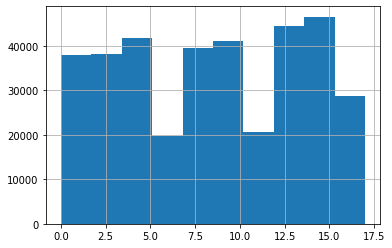

In [7]:
FechaCompra = np.concatenate((week,fechita,Hora,monto,id),axis=1)
FechaCompra=pd.DataFrame(FechaCompra,columns=['Week','Fecha','Hora','Minuto','Monto',"ID"])
FechaCompra["Fecha"] -=738467
Navidad = FechaCompra[FechaCompra["Fecha"] == 33].groupby("Fecha")["Monto"].sum()
gastosdias =FechaCompra.groupby("Fecha")["Monto"].sum().sort_values()
FechaCompra["Week"].hist()
FechaCompra

Week
16    4290688.57
14    4017582.17
5     3997356.15
12    3946698.02
6     3687592.04
1     3664265.44
7     3629691.13
15    3618699.49
9     3575700.39
8     3538228.18
3     3500761.22
13    3490017.98
4     3464492.78
11    3344520.67
10    3286879.91
2     2968320.88
0     2935527.57
17     542238.24
Name: Monto, dtype: object

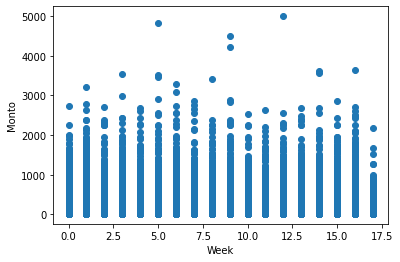

In [8]:
import matplotlib.pyplot as plt

plt.scatter(FechaCompra["Week"], FechaCompra["Monto"])
plt.xlabel("Week")
plt.ylabel("Monto")
gastossemana =FechaCompra.groupby("Week")["Monto"].sum().sort_values(ascending=False)
gastossemana

# Gasto semanal por ID

In [47]:
gastosdiaid =FechaCompra.groupby(["Fecha","ID"])["Monto"].sum()
gastosdiaid = pd.DataFrame(gastosdiaid)
gastosdiaid=gastosdiaid.reset_index()
gastosdiaid

,Fecha,ID,Monto
0,0,9,105.51
1,0,10,31.91
2,0,19,172.72
3,0,23,122.13
4,0,32,569.1
...,...,...,...
222973,119,9968,84.9
222974,119,9970,267.64
222975,119,9984,67.34
222976,119,9985,253.43


In [55]:
for i in range(len(gastosdiaid)):
    i=5
    quincenaID=gastosdiaid.loc[gastosdiaid["Fecha"]== i]
    i+=15
quincenaID

KeyboardInterrupt: 

In [73]:
q1=5
dias_quincena=[q1,q1+15,q1+15*2,q1+15*3,q1+15*4,q1+15*5,q1+15*6,q1+15*7]
dias_quincena[0]


5

In [79]:

mask=(gastosdiaid["Fecha"]==dias_quincena[0]) | (gastosdiaid["Fecha"]==dias_quincena[1])| (gastosdiaid["Fecha"]==dias_quincena[2])| (gastosdiaid["Fecha"]==dias_quincena[3])| (gastosdiaid["Fecha"]==dias_quincena[4]) | (gastosdiaid["Fecha"]==dias_quincena[5])| (gastosdiaid["Fecha"]==dias_quincena[6])| (gastosdiaid["Fecha"]==dias_quincena[7])

quincenaID = gastosdiaid.loc[mask]
quincenaID

,Fecha,ID,Monto
8162,5,9,112.5
8163,5,33,152.17
8164,5,55,508.88
8165,5,71,609.1
8166,5,73,701.86
...,...,...,...
203485,110,9942,417.39
203486,110,9961,285.84
203487,110,9966,47.87
203488,110,9971,69.83


In [34]:
gastossemanaid =FechaCompra.groupby(["Week","ID"])["Monto"].sum()
gastossemanaid = pd.DataFrame(gastossemanaid)
gastossemanaid

Monto
Week ID           
0    7      180.51
     9     2318.81
     10      31.91
     14     361.22
     15      62.35
...            ...
17   9968     84.9
     9970   267.64
     9984    67.34
     9985   253.43
     9987    419.1

[93395 rows x 1 columns]

In [38]:
gastossemanaid=gastossemanaid.reset_index()
gastossemanaid

,Week,ID,Monto
0,0,7,180.51
1,0,9,2318.81
2,0,10,31.91
3,0,14,361.22
4,0,15,62.35
...,...,...,...
93390,17,9968,84.9
93391,17,9970,267.64
93392,17,9984,67.34
93393,17,9985,253.43


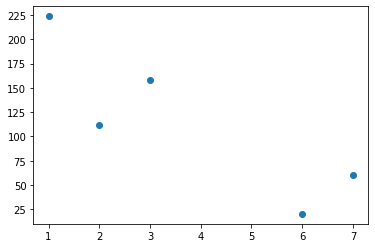

In [28]:
semanalID=gastossemanaid.loc[gastossemanaid["ID"]== 1]
semanalID2=gastossemanaid.loc[gastossemanaid["ID"]== 7]
plt.scatter(semanalID["Week"],semanalID["Monto"])

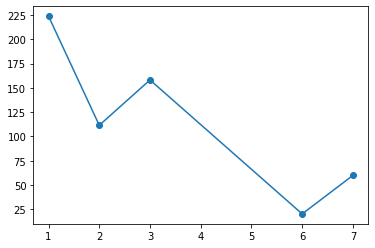

In [29]:
plt.plot(semanalID["Week"],semanalID["Monto"],'-o')

In [ ]:
TDD = df[df["Transaccion"] == "TDD"].groupby("ID")["Transaccion"].count()
TDD = TDD.reindex(df["ID"].unique(), fill_value=0)
TDD = pd.DataFrame({"TDD":TDD})
TDD = TDD.sort_values("ID")
TDC = df[df["Transaccion"] == "TDC"].groupby("ID")["Transaccion"].count()
TDC = TDC.reindex(df["ID"].unique(), fill_value=0)
TDC = pd.DataFrame({"TDC":TDC})
TDC = TDC.sort_values("ID")
ID = df["ID"].sort_values().unique()
ID = pd.DataFrame(ID,columns=["ID"])
transaccion = df.groupby("ID")["Transaccion"].count()
transaccion = pd.DataFrame(transaccion,columns=["Transaccion"])
suma = df.groupby("ID")["Monto"].sum()
edad = df.groupby("ID")["Edad"].mean()
suma = pd.DataFrame(suma,columns=["Monto"])
edad = pd.DataFrame(edad,columns= ["Edad"])

In [ ]:
agrupacion = np.concatenate((ID,suma,edad,transaccion,TDD,TDC),axis=1)
agrupacion = pd.DataFrame(agrupacion,columns=["ID","Monto","Edad","Total de Transacciones","TDD","TDC"])
agrupacion.Edad.value_counts(bins=[0,17,35,50,80,100,123]) #Cantidad de gente por edad
#agrupacion.loc[agrupacion["ID"]==8828]
agrupacion["Monto"].value_counts(bins=[0,7800,99999999])

(-0.001, 7800.0]        7305
(7800.0, 99999999.0]    2695
Name: Monto, dtype: int64